<h3>12.4 Pytorch实现DiscoGAN</h3>

<h3>12.4.1 DiscoGAN架构</h3>

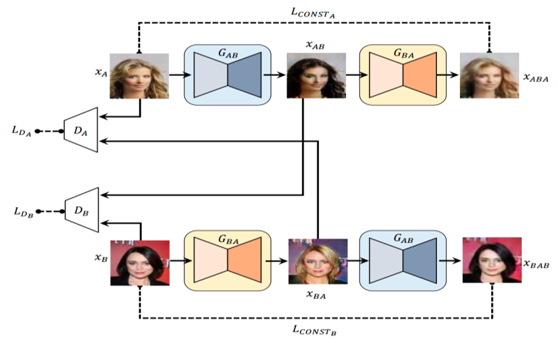

<h3>12.4.3 DiscoGAN实现</h3>

In [1]:
import torch

from DiscoGAN12.trainer import Trainer
from DiscoGAN12.config import get_config
from DiscoGAN12.data_loader import get_loader
from DiscoGAN12.utils import prepare_dirs_and_logger, save_config

In [2]:
def main(config):
    prepare_dirs_and_logger(config)

    torch.manual_seed(config.random_seed)
    if config.num_gpu > 0:
        torch.cuda.manual_seed(config.random_seed)

    if config.is_train:
        data_path = config.data_path
        batch_size = config.batch_size
    else:
        if config.test_data_path is None:
            data_path = config.data_path
        else:
            data_path = config.test_data_path
        batch_size = config.sample_per_image

    a_data_loader, b_data_loader = get_loader(
            data_path, batch_size, config.input_scale_size,
            config.num_worker, config.skip_pix2pix_processing)

    trainer = Trainer(config, a_data_loader, b_data_loader)

    if config.is_train:
        save_config(config)
        trainer.train()
    else:
        if not config.load_path:
            raise Exception("[!] You should specify `load_path` to load a pretrained model")
        trainer.test()


In [8]:
if __name__ == "__main__":
    config, unparsed = get_config()
    print(config)
    #main(config)

Namespace(a_grayscale=False, b_grayscale=False, batch_size=200, beta1=0.5, beta2=0.999, cnn_type=0, d_num_layer=5, data_dir='DiscoGAN12/data', dataset='edges2shoes', fc_hidden_dim=128, g_num_layer=3, input_scale_size=64, is_train=False, load_path='logs/edges2shoes_2019-05-24_10-37-37', log_dir='logs', log_level='INFO', log_step=50, loss='log_prob', lr=0.0002, max_step=9000, num_gpu=0, num_log_samples=3, num_worker=12, optimizer='adam', random_seed=123, sample_per_image=64, save_step=500, skip_pix2pix_processing=False, test_data_path=None, weight_decay=0.0001)


In [7]:
#https://github.com/carpedm20/DiscoGAN-pytorch

In [5]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

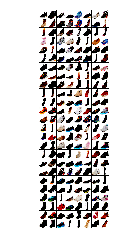

In [11]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/8950_x_BAB.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()


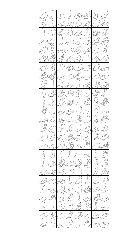

In [12]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/valid_x_A.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

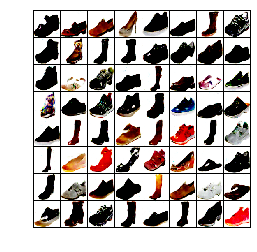

In [7]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_AB.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

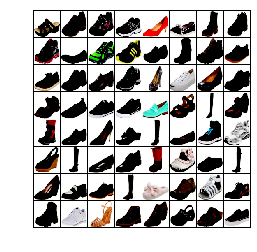

In [14]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_B.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

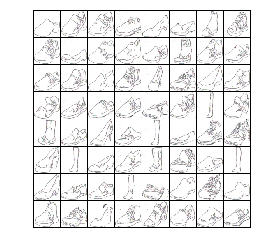

In [15]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_BA.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

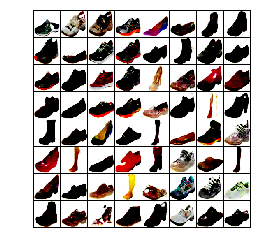

In [16]:
reconsPath = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_BAB.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

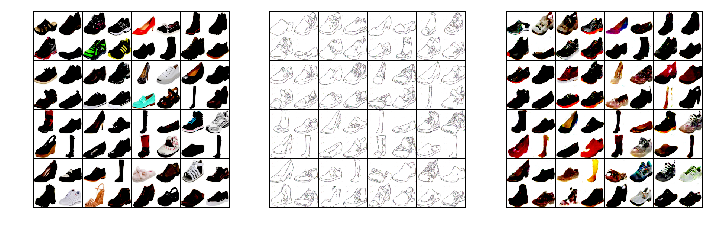

In [28]:
plt.figure(figsize=(12,8))
reconsPath1 = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_B.png'
Image1 = mpimg.imread(reconsPath1)
reconsPath2 = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_BA.png'
Image2 = mpimg.imread(reconsPath2)
reconsPath3 = 'logs/edges2shoes_2019-05-24_10-37-37/test/25_x_BAB.png'
Image3 = mpimg.imread(reconsPath3)
plt.subplot(1,3,1)
plt.imshow(Image1) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(1,3,2)
plt.imshow(Image2) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.subplot(1,3,3)
plt.imshow(Image3) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()